In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from scipy import optimize
from scipy import stats

import tensorflow_probability as tfp
from sstudentt import SST

np.random.seed(1234)

In [2]:
data = pd.read_csv("preprocessed_data/gdp.csv", index_col=0)
data = data.pct_change(periods=1).iloc[1:, ]
data = data * 100
data

,Bulgaria,Estonia,Lithuania,Romania
GEO/TIME,,,,
1999Q2,-2.641112,0.878472,0.393100,-0.306858
1999Q3,-0.840204,1.029985,-1.237407,1.016464
1999Q4,-5.439780,2.591265,0.192459,0.930060
2000Q1,10.080292,3.796664,2.164851,1.040844
2000Q2,0.925707,2.504846,1.020945,1.391446
...,...,...,...,...
2020Q4,1.406751,2.196841,1.555077,3.888464
2021Q1,1.786466,3.330538,1.707526,1.946385
2021Q2,0.915789,2.419048,1.202280,1.594133


In [3]:
quantiles = [
             0.05,
             0.25,
             0.75,
             0.95]

n = 2**10
x = np.linspace(-15, 15, n)

In [4]:
def opt1(parameters, data):
    dist = tfp.distributions.SinhArcsinh(loc = parameters[0], 
                                         scale = parameters[1], 
                                         skewness = parameters[2], 
                                         tailweight = parameters[3])
    error = np.array(dist.quantile(quantiles)) - data
    return error

def opt2(parameters, data):
    dist = SST(mu = parameters[0], sigma = parameters[1], nu = parameters[2], tau = parameters[3])
    error = dist.q(quantiles) - data
    return error

In [5]:
def estimate_density(data_input):
    data = [np.quantile(data_input, 0.05),
            np.quantile(data_input, 0.25),
            np.quantile(data_input, 0.75),
            np.quantile(data_input, 0.95)]
    
    initial_estimates = np.array([1., 1., 1., 2.])

    parameters_est = optimize.leastsq(opt1, initial_estimates, (data, ))
    
    dist_result = tfp.distributions.SinhArcsinh(loc=parameters_est[0][0], 
                                     scale=parameters_est[0][1], 
                                     skewness=parameters_est[0][2], 
                                     tailweight=parameters_est[0][3])
    

    n = 2**10
    x = np.linspace(-15, 15, n)

    density = dist_result.prob(x)
    
    return density, dist_result, parameters_est

def estimate_density_sst(data_input):
    data = [np.quantile(data_input, 0.05),
            np.quantile(data_input, 0.25),
            np.quantile(data_input, 0.75),
            np.quantile(data_input, 0.95)]
    
    initial_estimates = np.array([1., 1., 1., 3.])

    parameters_est = optimize.leastsq(opt2, initial_estimates, (data, ))
    
    dist_result = SST( 
              mu = parameters_est[0][0], 
              sigma = parameters_est[0][1], 
              nu = parameters_est[0][2],
              tau = parameters_est[0][3]
              )

    n = 2**10
    x = np.linspace(-15, 15, n)

    density = dist_result.d(x)
    
    return density, dist_result, parameters_est

Text(0.5, 1.0, 'Fitted distributions for Bulgaria')

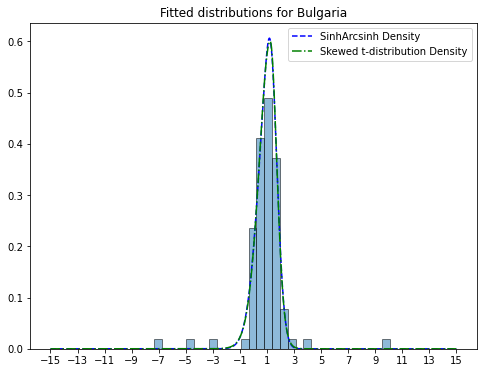

In [6]:
density, dist_result, parameters_est = estimate_density(data['Bulgaria'].loc["2000Q1":"2021Q4"])
density2, dist_result2, parameters_est2 = estimate_density_sst(data['Bulgaria'].loc["2000Q1":"2021Q4"])

plt.figure(figsize=(8, 6))
data['Bulgaria'].loc["2000Q1":"2021Q4"].hist(grid = False, bins = 30, density=True, alpha=0.5, edgecolor='black', linewidth=1)

plt.plot(x, density, c='b', linestyle='--')
plt.plot(x, density2, c='g', linestyle='-.')
plt.legend(['SinhArcsinh Density', 'Skewed t-distribution Density'])
plt.xticks(np.arange(-15, 16, step=2))
plt.title('Fitted distributions for Bulgaria')
#plt.show()
#plt.savefig('data/small_countries/gdp_observed_bulgaria.png')

In [7]:
sinarcsin = dist_result.sample(sample_shape=(1000), seed=1234)
skew_t_dist = dist_result2.r(n=1000)
stats.ks_2samp(skew_t_dist, sinarcsin)

KstestResult(statistic=0.03, pvalue=0.7593695685682871)

/Users/myanchev/miniforge3/lib/python3.9/site-packages/sstudentt/sstudentt.py:36: RuntimeWarning: invalid value encountered in sqrt
  self.mu_0 = self.mu - (self.sigma * self.m / np.sqrt(self.s2))
/Users/myanchev/miniforge3/lib/python3.9/site-packages/sstudentt/sstudentt.py:37: RuntimeWarning: invalid value encountered in sqrt
  self.sigma_0 = self.sigma / np.sqrt(self.s2)


Text(0.5, 1.0, 'Fitted distributions for Estonia')

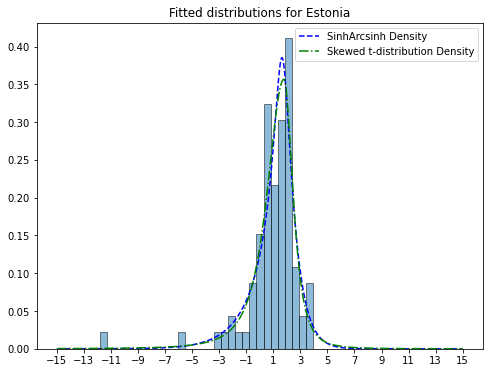

In [8]:
density, dist_result, parameters_est = estimate_density(data['Estonia'].loc["2000Q1":"2021Q4"])
density2, dist_result2, parameters_est2 = estimate_density_sst(data['Estonia'].loc["2000Q1":"2021Q4"])

plt.figure(figsize=(8, 6))
data['Estonia'].loc["2000Q1":"2021Q4"].hist(grid = False, bins = 30, density=True, alpha=0.5, edgecolor='black', linewidth=1)

plt.plot(x, density, c='b', linestyle='--')
plt.plot(x, density2, c='g', linestyle='-.')
plt.legend(['SinhArcsinh Density', 'Skewed t-distribution Density'])
plt.xticks(np.arange(-15, 16, step=2))
plt.title('Fitted distributions for Estonia')
#plt.show()
#plt.savefig('data/small_countries/gdp_observed_estonia.png')

In [9]:
sinarcsin = dist_result.sample(sample_shape=(1000), seed=1234)
skew_t_dist = dist_result2.r(n=1000)
stats.ks_2samp(skew_t_dist, sinarcsin)

KstestResult(statistic=0.054, pvalue=0.1082872208757189)

/Users/myanchev/miniforge3/lib/python3.9/site-packages/sstudentt/sstudentt.py:36: RuntimeWarning: invalid value encountered in sqrt
  self.mu_0 = self.mu - (self.sigma * self.m / np.sqrt(self.s2))
/Users/myanchev/miniforge3/lib/python3.9/site-packages/sstudentt/sstudentt.py:37: RuntimeWarning: invalid value encountered in sqrt
  self.sigma_0 = self.sigma / np.sqrt(self.s2)


Text(0.5, 1.0, 'Fitted distributions for Lithuania')

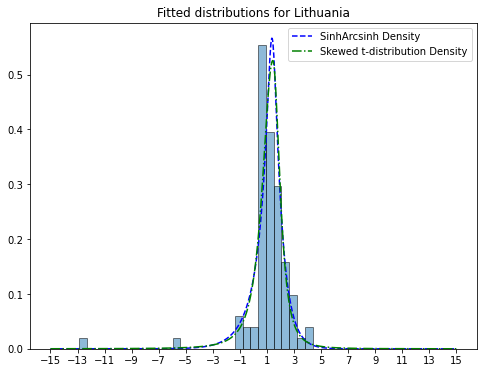

In [10]:
density, dist_result, parameters_est = estimate_density(data['Lithuania'].loc["2000Q1":"2021Q4"])
density2, dist_result2, parameters_est2 = estimate_density_sst(data['Lithuania'].loc["2000Q1":"2021Q4"])

plt.figure(figsize=(8, 6))
data['Lithuania'].loc["2000Q1":"2021Q4"].hist(grid = False, bins = 30, density=True, alpha=0.5, edgecolor='black', linewidth=1)

plt.plot(x, density, c='b', linestyle='--')
plt.plot(x, density2, c='g', linestyle='-.')
plt.legend(['SinhArcsinh Density', 'Skewed t-distribution Density'])
plt.xticks(np.arange(-15, 16, step=2))
plt.title('Fitted distributions for Lithuania')
#plt.show()
#plt.savefig('data/small_countries/gdp_observed_lithuania.png')

In [11]:
sinarcsin = dist_result.sample(sample_shape=(1000), seed=1234)
skew_t_dist = dist_result2.r(n=1000)
stats.ks_2samp(skew_t_dist, sinarcsin)

KstestResult(statistic=0.021, pvalue=0.9802627322900355)

/Users/myanchev/miniforge3/lib/python3.9/site-packages/sstudentt/sstudentt.py:31: RuntimeWarning: invalid value encountered in sqrt
  self.tau ** 0.5) ** -1
/Users/myanchev/miniforge3/lib/python3.9/site-packages/sstudentt/sstudentt.py:32: RuntimeWarning: invalid value encountered in sqrt
  self.m = ((2 * self.tau ** 0.5) * (self.nu - self.nu ** -1)) / (
/Users/myanchev/miniforge3/lib/python3.9/site-packages/sstudentt/sstudentt.py:36: RuntimeWarning: invalid value encountered in sqrt
  self.mu_0 = self.mu - (self.sigma * self.m / np.sqrt(self.s2))
/Users/myanchev/miniforge3/lib/python3.9/site-packages/sstudentt/sstudentt.py:37: RuntimeWarning: invalid value encountered in sqrt
  self.sigma_0 = self.sigma / np.sqrt(self.s2)
/Users/myanchev/miniforge3/lib/python3.9/site-packages/scipy/optimize/minpack.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


Text(0.5, 1.0, 'Fitted distributions for Romania')

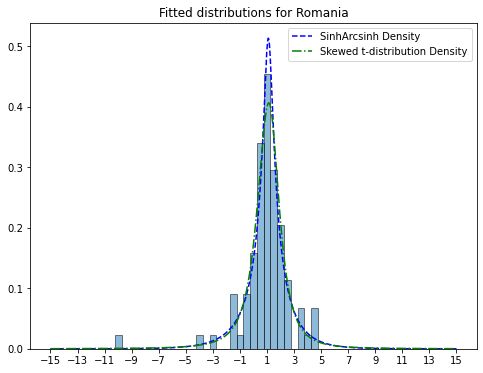

In [12]:
density, dist_result, parameters_est = estimate_density(data['Romania'].loc["2000Q1":"2021Q4"])
density2, dist_result2, parameters_est2 = estimate_density_sst(data['Romania'].loc["2000Q1":"2021Q4"])

plt.figure(figsize=(8, 6))
data['Romania'].loc["2000Q1":"2021Q4"].hist(grid = False, bins = 30, density=True, alpha=0.5, edgecolor='black', linewidth=1)

plt.plot(x, density, c='b', linestyle='--')
plt.plot(x, density2, c='g', linestyle='-.')
plt.legend(['SinhArcsinh Density', 'Skewed t-distribution Density'])
plt.xticks(np.arange(-15, 16, step=2))
plt.title('Fitted distributions for Romania')
#plt.show()
#plt.savefig('data/small_countries/gdp_observed_romania.png')

In [13]:
sinarcsin = dist_result.sample(sample_shape=(1000), seed=1234)
skew_t_dist = dist_result2.r(n=1000)
stats.ks_2samp(skew_t_dist, sinarcsin)

KstestResult(statistic=0.055, pvalue=0.09710349657052789)